BAO Analysis with Linear Point for TAIPAN Survey Mocks
=============================================

#### Suchetha Cooray (<cooray@nagoya-u.jp>), Cullan Howlett (<cullan.howlett@uwa.edu.au>)

*This is core of the work I did during my research internship at the
International Centre for Radio Astronomy Research (ICRAR) from 09/07/2018 to
02/09/2018. The work was supervised by Dr. Cullan Howlett. He is awesome.*

## Contents
1. [Introduction](#Introduction)
2. [Code Organization](#Code-Organization)
3. [Methodology](#Methodology)
    - [TAIPAN Survey Mocks](#TAIPAN-Survey-Mocks)
    - [Fitting Procedure](#Fitting-Procedure)
    - [Measurements](#Measurements)
    - [Error Calculation](#Error-Calculation)
4. [Results](#Results)
5. [Discussion](#Discussion)
6. [To be](#)


Introduction
--------------
Measuring the Baryonic Acoustic Oscillation (BAO) in the clustering of galaxies
provides a standard ruler to infer cosmological distances and also a way to
constrain cosmological models. Due to this effect, we expect a "bump" in
two-point correlation function in the clustering of galaxies. But, the measured 
BAO signature is not what we expect from linear structure growth due to the 
non-linear growth in smaller scales. This results in smaering the bump we measure. 
To counter this, we apply a method called the linear point for our analysis.

The *linear point* (LP) is the midpoint of the observed peak and the first dip before
the peak. This was shown by Stefano Anselmi et al. 2017 (Anselmi17) as a measurement 
of the BAO signature that is largely insensitive to the non-linear effects. We 
applied the above methodology to the TAIPAN survey mocks.

This jupyter notebook gives an overview of the methods and the usage of code developed 
for the analysis. First we load the necessary packages including the `bao` code and 
set parameters.

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import random
import bao

%run astro_plot_style.py #Run this for "professional" looking plots

#paramters for fitting
range_of_s = [50,130]
fit_function = bao.Polynomial.poly5
bin_size = 5
mock_number = 879
s_squared = True

Code Organization
-----------------
`bao` is written in python 3 and contains 5 main classes. They are;
1. Correlation_Function - 
Class for dealing with galaxy two point correlation functions

2. Covariance_Matrix -
Class for dealing with covariance matrix often associated to Correlation_Function 
objects

3. Power_Spectrum -
Class for dealing with galaxy power spectrum

4. BAO_Measurements -
Class that contains all the measurements and other related information from 
the correlation function.

5. BAO_fit -
Class that contains fitting routines on correlation functions.

6. Polynomial -
Class that contains callable polynomial functions for fitting

The classes are very natural as they have attributes and methods associated
to deal with them.

Methodology
--------------------------

### TAIPAN Survey Mocks
We have tried applying the linear point method on the simulations mimicking 
the upcoming Taipan galaxy survey. Taipan is a spectroscopic survey covering 
the southern sky and will obtain spectra for more than 1 million galaxies in 
the local Universe (z<0.3). We obtained 1000 mock simulation and two-point 
correlation function for each mock simulation. 

An example of a mock correlation function is show below. First we load the 
correlation function using the mock number and the location of the mock files. 
We use `bao.Correlation_Function.from_mock` but we can also read any file 
using `bao.Correlation_Function.from_file`. The read correlation function `cf` 
is saved as a `Correlation_Function` instance. In this example we read the mock
879 with bin with of 5 Mpc.

In [2]:
cf = bao.Correlation_Function.from_mock_bin(mock_number, \
    "Mock_taipan_year1_v1.xi/{}/".format(bin_size),bin_size=bin_size)

We then read the corresponding covariance matrix from file using 
`bao.Covariance_Matrix.from_file` and save it in the same instance.

In [3]:
cf.set_covariance(bao.Covariance_Matrix.from_file( \
                "Mock_taipan_year1_v1.xi0cov_{}".format(bin_size)))

A typical correlation function from the simulations look like this. Correlation 
functions are plot using `bao.Correlation_Function.plot_data`. If `s2 = True`,
$s^{2} \xi (s)$ is plot. Otherwise, $ \xi (s)$ is plot.

[Text(0.5,1,'TAIPAN Survey Mock 879 Correlation Function')]

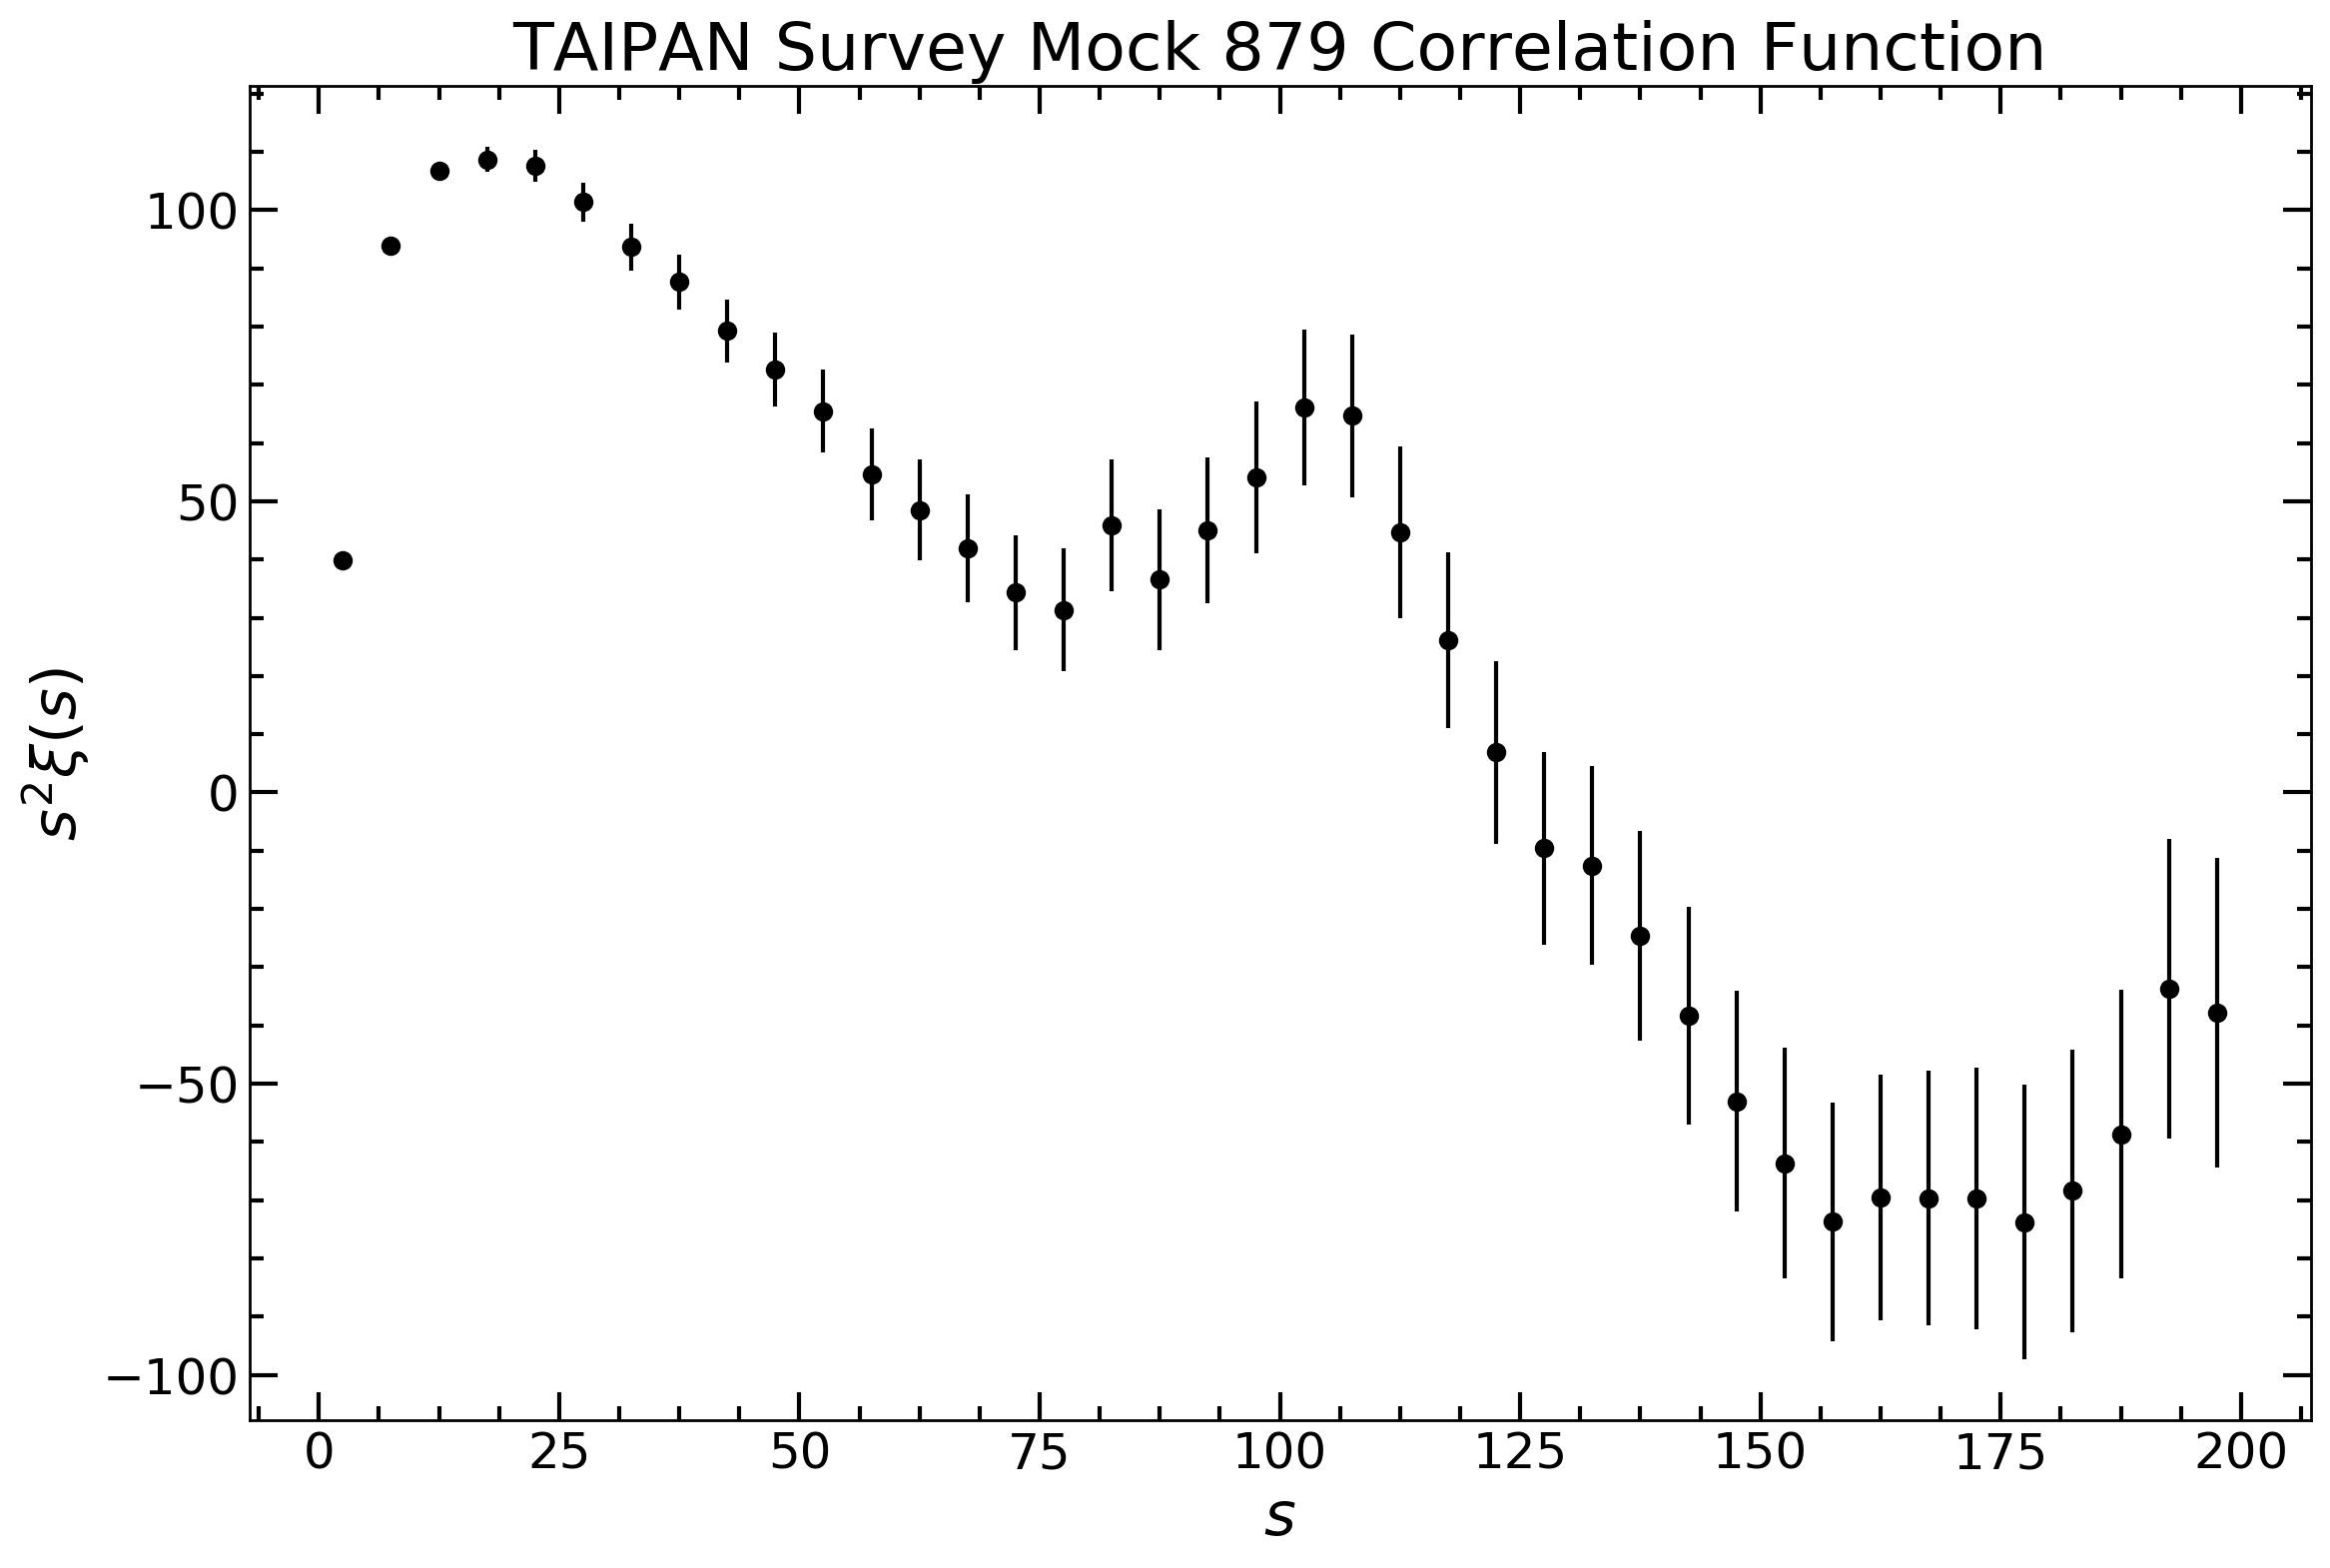

In [7]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = bao.Correlation_Function.plot_data(ax, cf, s2=s_squared)
ax.set(title = "TAIPAN Survey Mock {} Correlation Function".format(mock_number))

### Fitting Procedure

We first limit our fitting range and copy into another `Correlation_Function` 
instance. This range-limited correlation function can then be fit.
In this case, we fit with a 5th order polynomial Following Anselmi17. 
Plotting of the best fit can be done through `bao.Correlation_Function.plot_bestfit`.
We can easily plot the measurements of BAO by `bao.Correlation_Function.plot_measurements`
as shown below.

[Text(0.5,1,'TAIPAN Survey Mock 879 Correlation Function')]

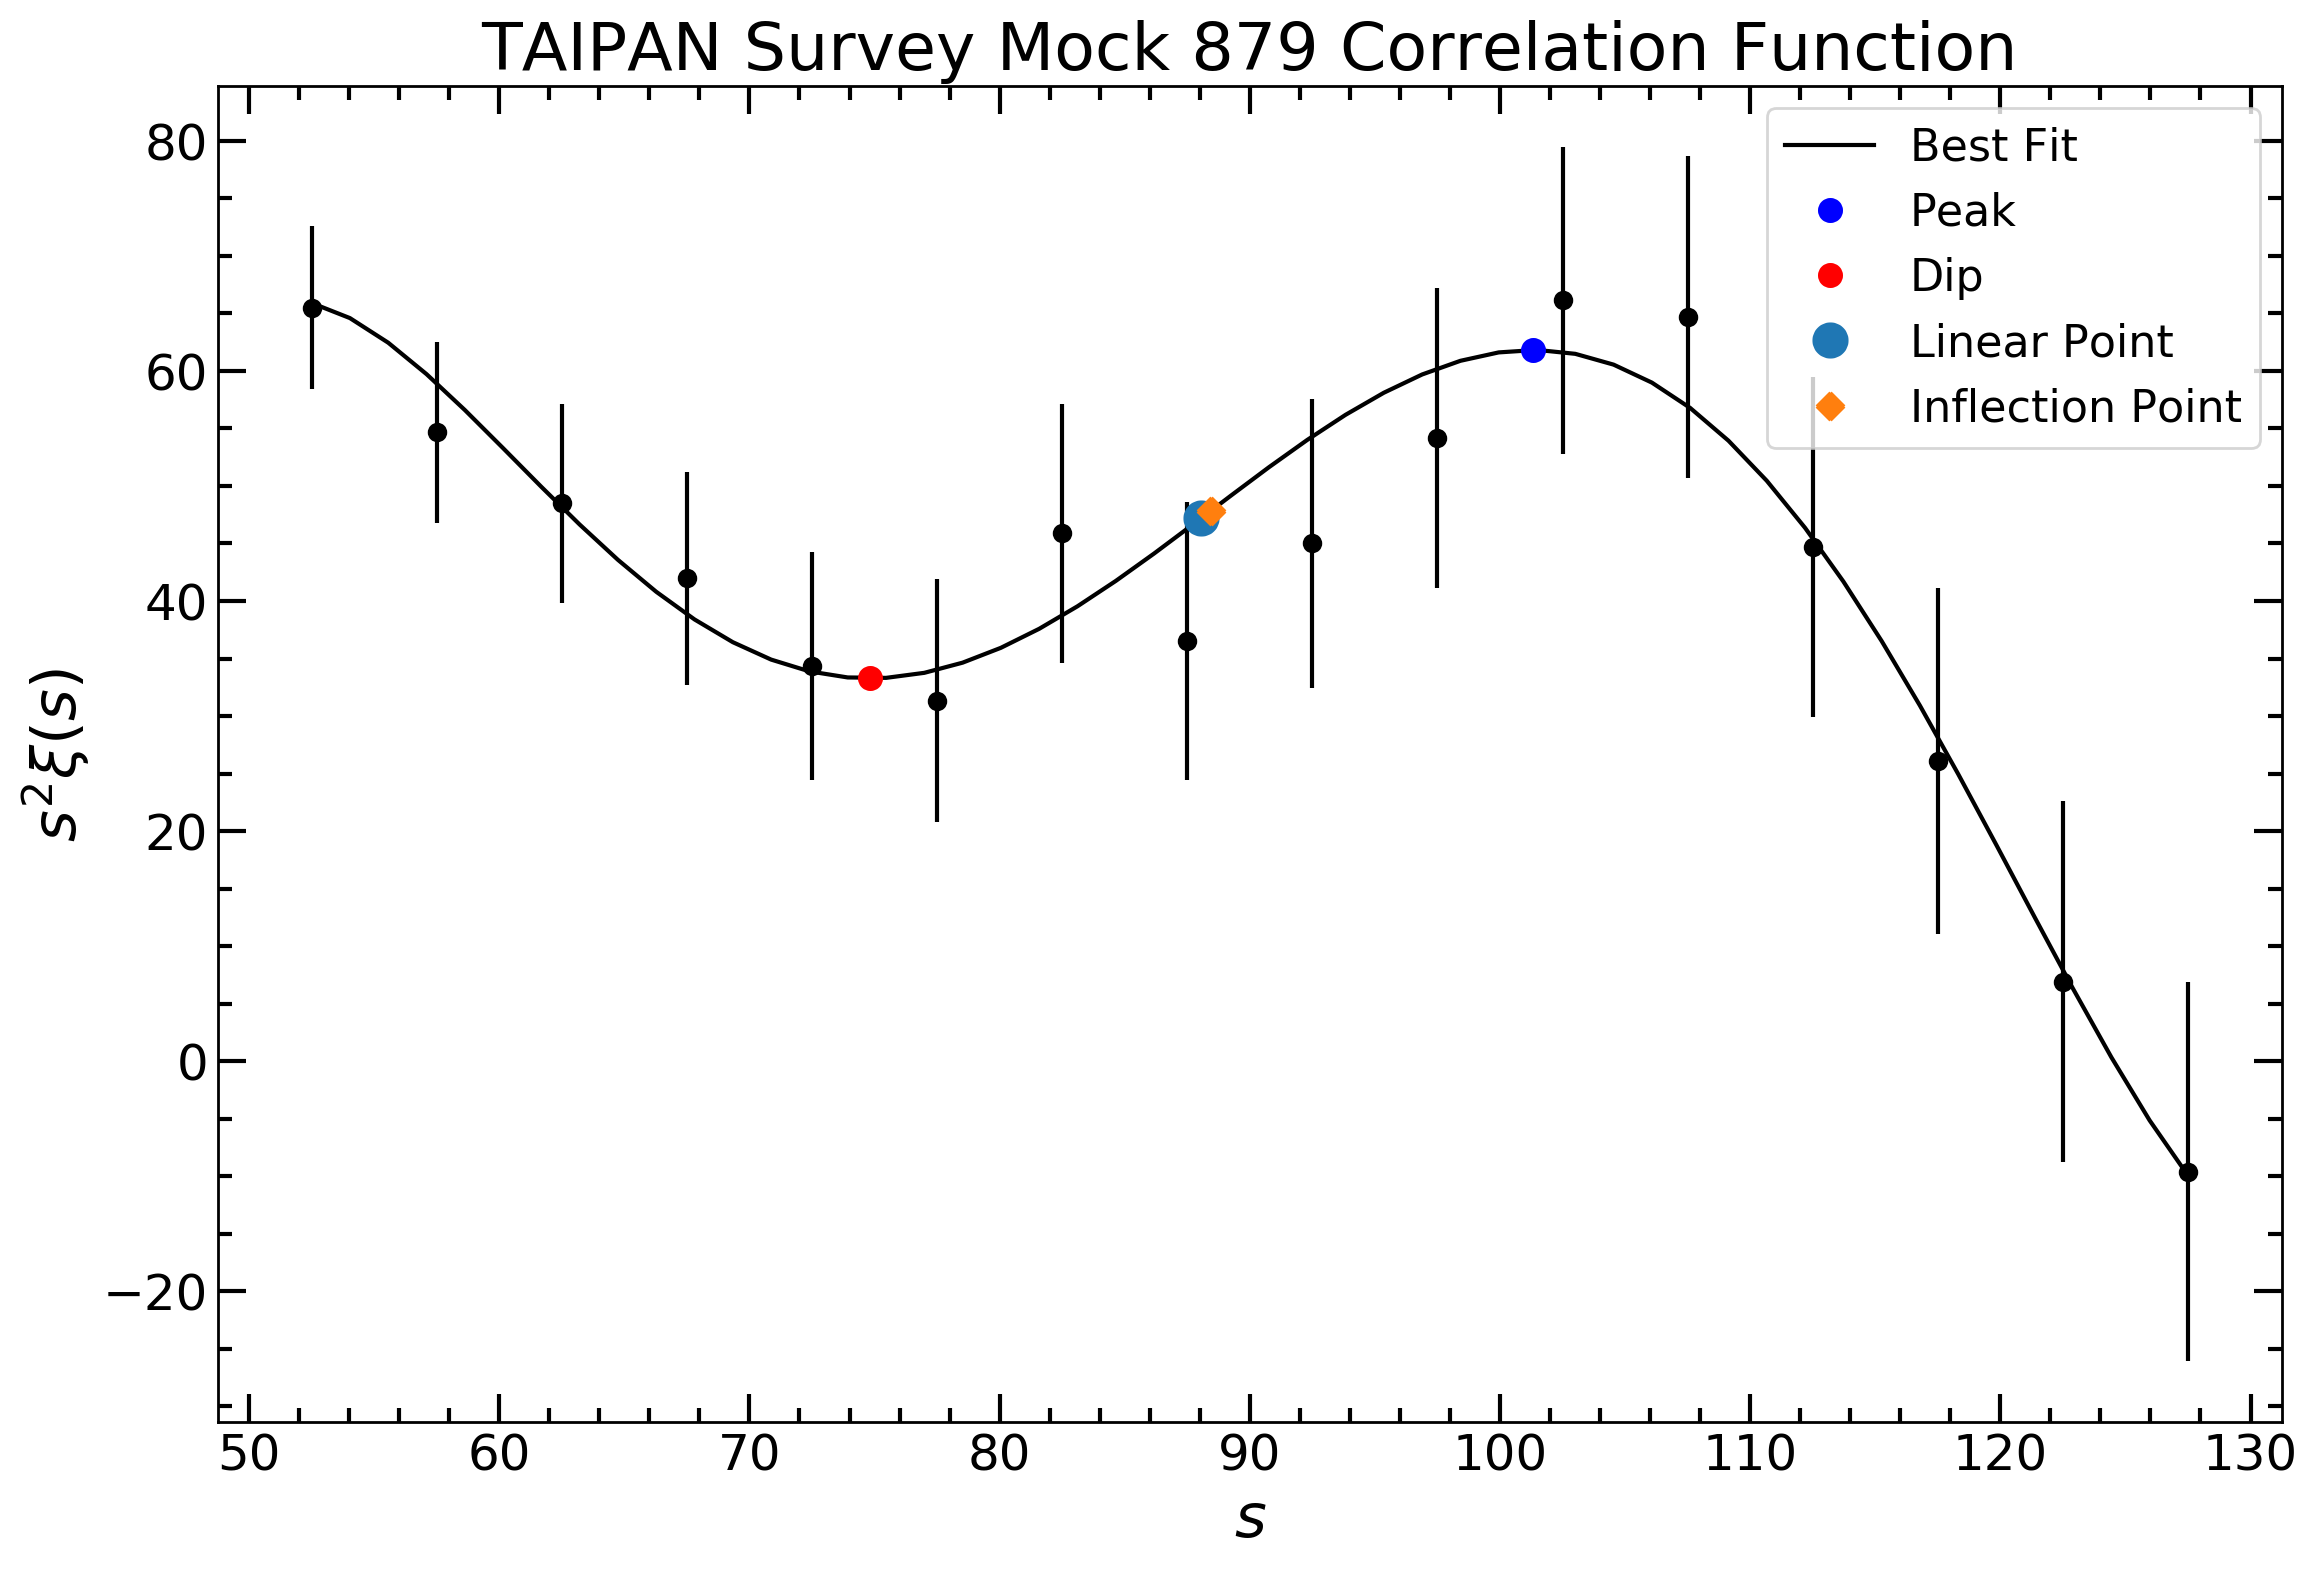

In [8]:
cf_limited = bao.Correlation_Function.limit_range(cf, s_range=range_of_s)

f, ax = plt.subplots(1,1, figsize=(12,8))
ax = bao.Correlation_Function.plot_data(ax, cf_limited, s2=s_squared)
ax = bao.Correlation_Function.plot_bestfit(ax, cf_limited,\
                                         fit_function, s2=s_squared)
ax = bao.Correlation_Function.plot_measurements(ax, cf_limited, s2=s_squared)
ax.legend()
ax.set(title = "TAIPAN Survey Mock {} Correlation Function".format(mock_number))

### Measurements

The measuremensts shown above are the peak, dip, linear point and the inflection point. They are all obtained from te best fit curve that is drawn using the correlation function data. The way each point is found is as follows.

#### Peak and Dip

They are calculated by taking the points where the first derivative is zero. Then the second derivative test is done to select the peak (maximum) adn the dip (minimum). Whether the points are within the fitting range is checked.

$s_{peak} = s $ where $\frac {d}{ds} f(s)=0$ and $\frac {d^2}{ds^2} f(s)<0$

$s_{dip} = s $ where $\frac {d}{ds} f(s)=0$ and $\frac {d^2}{ds^2} f(s)>0$

#### Linear Point

The linear point is calculated by taking the midpoint of the peak and the dip. i.e. 

$s_{LP} = \frac{1}{2} (s_{peak} + s_{dip})$

Linear point is selected by these conditions.
    1. The gradient of the curve should be positive where the linear point lie
    2. Should be within the fitting range
    3. The closest to s = 90
    
#### Inflection Point

In addition to the LP, we have tested the *inflection point* (IP). IP is the point
where the curvature of the best fit to the correlation function changes or the
point where the second derivative of the best fit is zero. We expect IP and LP
to lie close to each other.

### Error Calculation
We have also done MC realizations to calculate the
errors for the measurements.






### Inflection Point
 


